Jai_GaneshDeva


In [15]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [16]:
dataset = pd.read_csv("House_prediction.csv")
#print(dataset.head(25))
#dataset.shape
#print(dataset.head(25))
#dataset.isnull().any()

In [17]:

for ind in dataset.index:
    if dataset['floor'][ind]=='-':
        dataset['floor'][ind] ='0'

dataset['floor'] = pd.to_numeric(dataset['floor'])
#print(dataset.head(25))


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
#print(dataset.dtypes)

In [19]:
a = np.zeros(dataset.shape[0])
c = np.zeros(dataset.shape[0])
#e = np.zeros(dataset.shape[0])

b = dataset['animal'] == 'acept'
d = dataset['furniture'] == 'furnished'


for i in np.arange(dataset.shape[0]):
    if b[i]==True:
        a[i] = 1
    if d[i]==True:
        c[i] = 1
dataset['furnished_bool'] = c
dataset['animal_bool'] = a
print(dataset.head(25))

              city  area  rooms  bathroom  parking spaces  floor     animal  \
0        São Paulo    70      2         1               1      7      acept   
1        São Paulo   320      4         4               0     20      acept   
2     Porto Alegre    80      1         1               1      6      acept   
3     Porto Alegre    51      2         1               0      2      acept   
4        São Paulo    25      1         1               0      1  not acept   
5        São Paulo   376      3         3               7      0      acept   
6   Rio de Janeiro    72      2         1               0      7      acept   
7        São Paulo   213      4         4               4      4      acept   
8        São Paulo   152      2         2               1      3      acept   
9   Rio de Janeiro    35      1         1               0      2      acept   
10       São Paulo    26      1         1               0      2      acept   
11        Campinas    46      1         1           

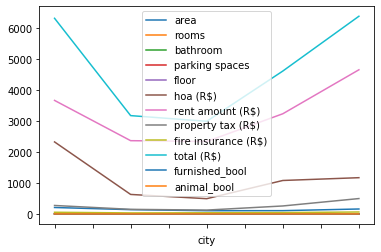

In [20]:
#q1 ans
dataset.groupby("city").mean()
#for plotting
dataset.groupby("city").mean().plot()


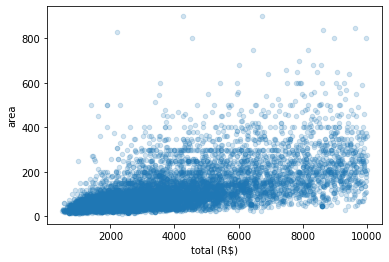

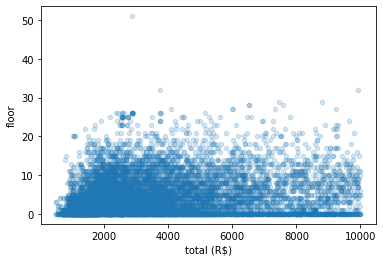

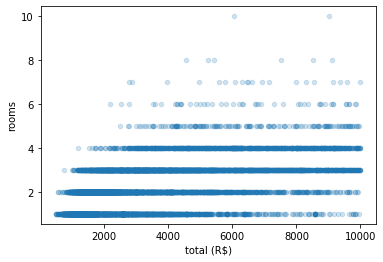

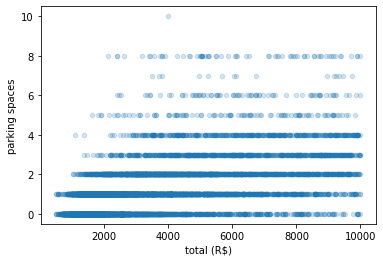

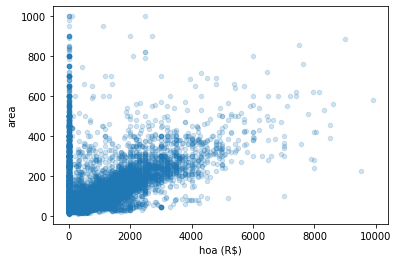

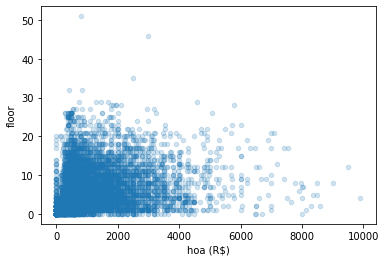

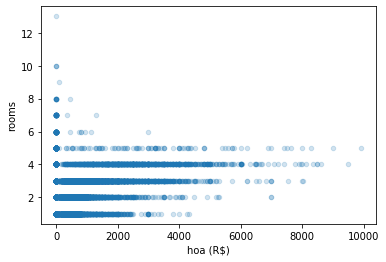

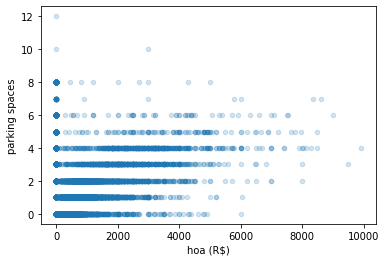

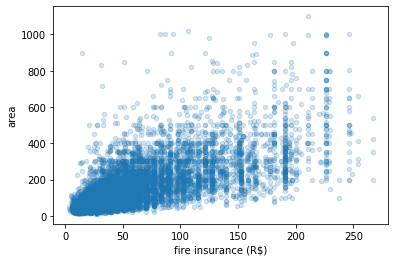

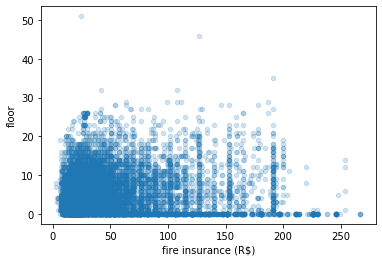

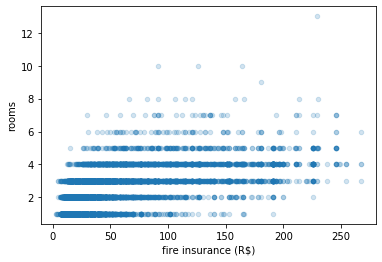

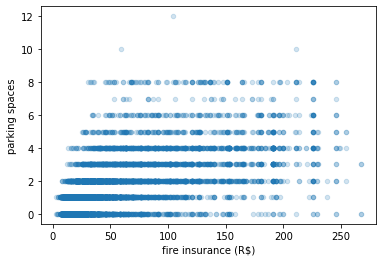

In [21]:
data = dataset[dataset['total (R$)']<10000]
data2 = data[data['area']<1000]
data3 = data[data['floor']<100]

data4 = dataset[dataset['hoa (R$)']<10000]
data5 = data4[data4['area']<1000]
data6 = data4[data4['floor']<100]
#plotting various curves
data7= dataset[dataset['fire insurance (R$)']<300]
data8 = data7[data7['area']<1500]
data9 = data7[data7['floor']<100]
data2.plot.scatter(x='total (R$)' , y='area' , alpha =0.2)
data3.plot.scatter(x='total (R$)' , y='floor' , alpha =0.2)
data.plot.scatter(x='total (R$)' , y='rooms' , alpha =0.2)
data.plot.scatter(x='total (R$)' , y='parking spaces' , alpha =0.2)

data5.plot.scatter(x='hoa (R$)' , y='area' , alpha =0.2)
data6.plot.scatter(x='hoa (R$)' , y='floor' , alpha =0.2)
data4.plot.scatter(x='hoa (R$)' , y='rooms' , alpha =0.2)
data4.plot.scatter(x='hoa (R$)' , y='parking spaces' , alpha =0.2)

data8.plot.scatter(x='fire insurance (R$)' , y='area' , alpha =0.2)
data9.plot.scatter(x='fire insurance (R$)' , y='floor' , alpha =0.2)
data7.plot.scatter(x='fire insurance (R$)' , y='rooms' , alpha =0.2)
data7.plot.scatter(x='fire insurance (R$)' , y='parking spaces' , alpha =0.2)


 
# with 
# increase in total price the range of values of area increases though the lower bound also seems to increase
# with increase in the total cost the floor number of the house tends to be low
# hoa tends to increase with the increase in area
# with decrease in the floor number the fire insurance tends to increase.


In [22]:
#dataset.describe()
X = dataset[['area','rooms','bathroom','parking spaces',
             'property tax (R$)','fire insurance (R$)',
             'furnished_bool', 'animal_bool','floor']].values

y = dataset['total (R$)'].values 

#print(dataset.dtypes)
#plt.figure(figsize=(15,10))
#plt.tight_layout()

In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,y,
 test_size=0.064721, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df)



1230.7601681907854
[-1.08282584e-01 -7.86856309e+02  1.37615570e+03 -4.49438614e+02
  1.01151344e+00  7.47936376e+01 -1.91579083e+02 -9.47414927e+02
  6.69706452e+01]
     Actual     Predicted
0      2450   2339.521168
1      5924   4977.830843
2      4061   4184.684862
3      6689   6337.861081
4      6347   6921.619022
5      2411   4239.075761
6      9879   8678.614641
7      2791   3571.166593
8      3763   3143.480173
9      1583   3994.599981
10    17560  22957.192557
11     1588   1256.684244
12    13340  11593.791913
13    20450  19683.884041
14     8173   8911.842572
15     4431   7487.743621
16     1801   2808.000963
17     3111   3372.473426
18     2205   1501.534495
19    16670  16712.495827
20     9116   9664.577111
21     6602   7368.424642
22     5955   7192.921488
23     1870   2198.446934
24     6993   8199.223146
25    12500  14417.655161
26     3399   4886.743661
27     1548      6.751342
28     7572   7527.206660
29     9567   9723.936409
..      ...           ...
6

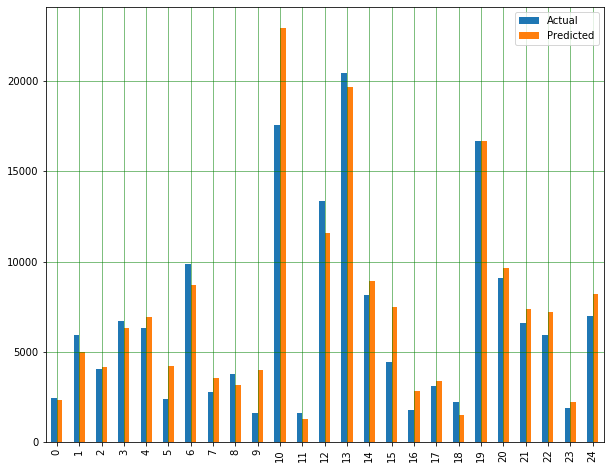

In [24]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1238.161911345953
Mean Squared Error: 2832398.5686637824
Root Mean Squared Error: 1682.9731336726034
